In [40]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-white')
#plt.style.available
#plt.style.use('seaborn-dark-palette')

### Load the interactions summary from Human Promoter Analysis

In [41]:
run = 1
numEx = 1000

df = pd.read_csv('TAL-GATA_binaryFeat_Analysis_euclidean_v8/Interactions_Results_v9_run'+str(run)+'_'+str(numEx)+'/interactions_summary_attnLimit-0.12.txt',sep='\t')

In [42]:
df.shape

(3653, 12)

In [43]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter2<-->filter8,402,M1110_1.02,0.015905,M6140_1.02,0.018356,288.0,432.0,182.0,177.0,1.112018e-01,4.960450e-01
1,filter2<-->filter9,403,M1110_1.02,0.015905,M6256_1.02,0.000012,378.0,246.0,204.0,221.0,2.971407e-08,7.174288e-07
2,filter2<-->filter13,407,M1110_1.02,0.015905,M0404_1.02,0.000097,660.0,576.0,201.0,257.0,6.809088e-01,1.000000e+00
3,filter2<-->filter16,410,M1110_1.02,0.015905,M0887_1.02,0.016985,12.0,420.0,159.0,229.0,9.999996e-01,1.000000e+00
4,filter2<-->filter18,412,M1110_1.02,0.015905,M0887_1.02,0.048181,402.0,156.0,180.0,158.0,8.214656e-01,1.000000e+00


##### keep significant interactions

In [44]:
df = df[df['adjusted_pval']<0.05]

In [45]:
threshold = 0.05
df = df[(df['motif1_qval'] < threshold) & (df['motif2_qval']<threshold)]

In [46]:
df.shape

(943, 12)

### Load the motif description file to annotate the interactions. 
Here I am using CISBP (U toronto) motif description file. 

In [47]:
df_annotate = pd.read_csv('../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [48]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


In [49]:
def get_annotation(motif_A, annotation_data=None, single_TF = False):
    #motif_A, motif_B = interaction.split('<-->')
    #print(motif_A)
    #print('there')
    TF_A = annotation_data[annotation_data['Motif_ID']==motif_A]['TF_Name']
    #TF_B = annotation_data[annotation_data['Motif_ID']==motif_B]['TF_Name']
    
    ##--If there is no annotation for a given motif--##
    #if len(TF_A)==0:
    TF_A = list(TF_A)
    #if len(TF_B)==0:
    #    TF_B = pd.Series([motif_B])
    ###################################################
    if len(TF_A) == 0:
        TF_A = [motif_A]
    
    if single_TF:
        return TF_A[0]
    else:
        return ','.join(TF_A)
    #print('here')
    #return TF_A

In [50]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)

In [51]:
df['TF_interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

In [52]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
1,filter2<-->filter9,403,M1110_1.02,0.015905,M6256_1.02,0.000012,378.0,246.0,204.0,221.0,2.971407e-08,7.174288e-07,HHEX,GATA4,HHEX$\longleftrightarrow$GATA4
23,filter2<-->filter64,458,M1110_1.02,0.015905,M0408_1.02,0.008752,84.0,594.0,220.0,165.0,1.310389e-03,1.122317e-02,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1
24,filter2<-->filter65,459,M1110_1.02,0.015905,M0408_1.02,0.000641,342.0,444.0,255.0,276.0,5.183092e-04,4.952815e-03,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1
33,filter2<-->filter83,477,M1110_1.02,0.015905,M0408_1.02,0.001488,618.0,318.0,226.0,197.0,1.087586e-03,9.531951e-03,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1
44,filter2<-->filter114,508,M1110_1.02,0.015905,M0891_1.02,0.038392,168.0,114.0,253.0,242.0,4.218307e-05,5.314960e-04,HHEX,TLX2,HHEX$\longleftrightarrow$TLX2


In [53]:
df = df[df['TF1']!=df['TF2']]

In [54]:
df.shape

(856, 15)

In [55]:
df.head(10)

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
1,filter2<-->filter9,403,M1110_1.02,0.015905,M6256_1.02,0.000012,378.0,246.0,204.0,221.0,2.971407e-08,7.174288e-07,HHEX,GATA4,HHEX$\longleftrightarrow$GATA4
23,filter2<-->filter64,458,M1110_1.02,0.015905,M0408_1.02,0.008752,84.0,594.0,220.0,165.0,1.310389e-03,1.122317e-02,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1
24,filter2<-->filter65,459,M1110_1.02,0.015905,M0408_1.02,0.000641,342.0,444.0,255.0,276.0,5.183092e-04,4.952815e-03,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1
33,filter2<-->filter83,477,M1110_1.02,0.015905,M0408_1.02,0.001488,618.0,318.0,226.0,197.0,1.087586e-03,9.531951e-03,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1
44,filter2<-->filter114,508,M1110_1.02,0.015905,M0891_1.02,0.038392,168.0,114.0,253.0,242.0,4.218307e-05,5.314960e-04,HHEX,TLX2,HHEX$\longleftrightarrow$TLX2
85,filter4<-->filter9,794,M0404_1.02,0.039270,M6256_1.02,0.000012,396.0,246.0,297.0,269.0,1.729730e-08,4.345072e-07,ZNF202,GATA4,ZNF202$\longleftrightarrow$GATA4
106,filter4<-->filter64,849,M0404_1.02,0.039270,M0408_1.02,0.008752,144.0,420.0,304.0,193.0,9.505331e-04,8.484918e-03,ZNF202,ZKSCAN1,ZNF202$\longleftrightarrow$ZKSCAN1
107,filter4<-->filter65,850,M0404_1.02,0.039270,M0408_1.02,0.000641,420.0,372.0,346.0,266.0,1.405180e-05,1.960453e-04,ZNF202,ZKSCAN1,ZNF202$\longleftrightarrow$ZKSCAN1
114,filter4<-->filter80,865,M0404_1.02,0.039270,M1868_1.02,0.023169,216.0,186.0,203.0,93.0,2.167413e-03,1.742954e-02,ZNF202,GATA2,ZNF202$\longleftrightarrow$GATA2
127,filter4<-->filter114,899,M0404_1.02,0.039270,M0891_1.02,0.038392,258.0,12.0,346.0,234.0,5.186402e-04,4.953599e-03,ZNF202,TLX2,ZNF202$\longleftrightarrow$TLX2


In [56]:
df = df.reset_index()

#### Fix redundant interaction pairs

In [57]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1'][i]
    TF2 = df['TF2'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


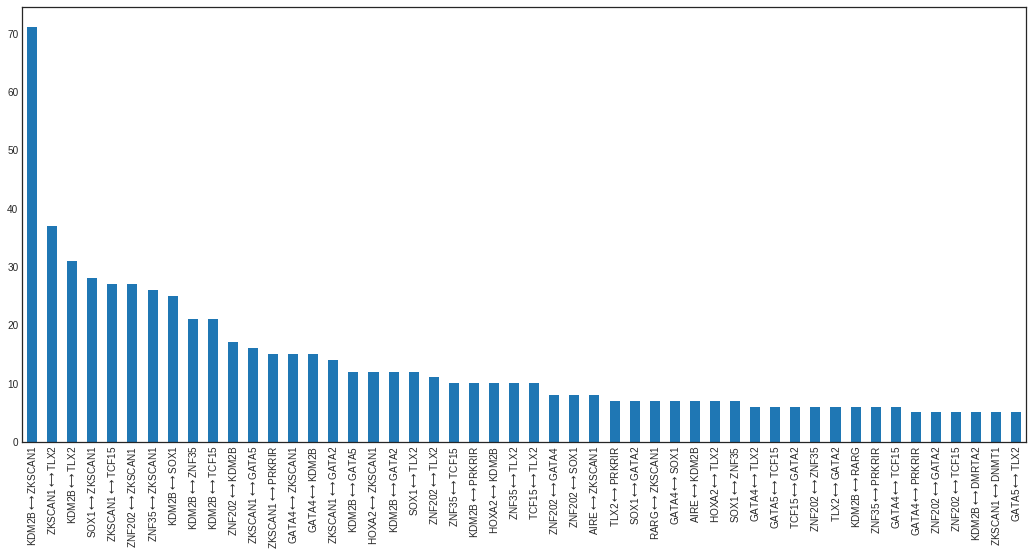

In [58]:
df['TF_interaction'].value_counts()[:50].plot(kind='bar', figsize=(18,8))

### Distribution of mean distance of interaction

Text(0.5, 1.0, 'Distribution of motif interaction distances')

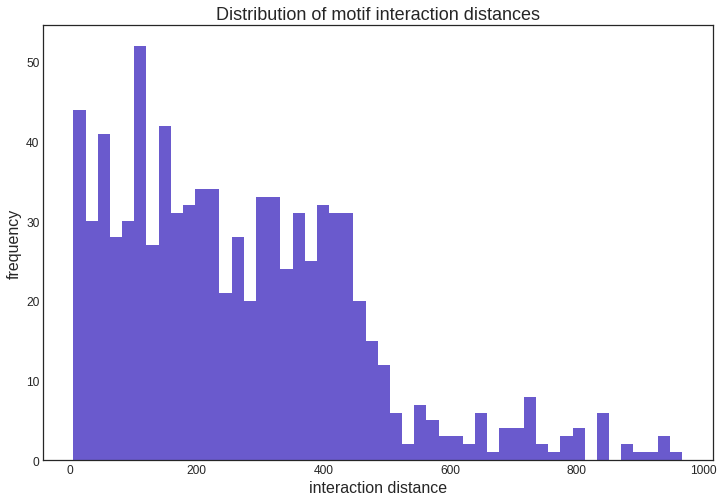

In [59]:
ax = df['mean_distance'].plot(kind='hist',bins=50, figsize=(12,8),color='slateblue',fontsize=12)
ax.set_xlabel("interaction distance",fontsize=16)
ax.set_ylabel("frequency",fontsize=16)
ax.xaxis.set_tick_params(rotation=0)
ax.set_title('Distribution of motif interaction distances',fontsize=18)

In [60]:
df['mean_distance'].mean(),df['mean_distance'].median()

(270.3434579439252, 240.0)

### Most Frequent TF Family Interactions

In [61]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]

In [62]:
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [63]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family
0,1,filter2<-->filter9,403,M1110_1.02,0.015905,M6256_1.02,0.000012,378.0,246.0,204.0,221.0,2.971407e-08,7.174288e-07,HHEX,GATA4,HHEX$\longleftrightarrow$GATA4,Homeodomain,GATA
1,23,filter2<-->filter64,458,M1110_1.02,0.015905,M0408_1.02,0.008752,84.0,594.0,220.0,165.0,1.310389e-03,1.122317e-02,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF
2,24,filter2<-->filter65,459,M1110_1.02,0.015905,M0408_1.02,0.000641,342.0,444.0,255.0,276.0,5.183092e-04,4.952815e-03,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF
3,33,filter2<-->filter83,477,M1110_1.02,0.015905,M0408_1.02,0.001488,618.0,318.0,226.0,197.0,1.087586e-03,9.531951e-03,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF
4,44,filter2<-->filter114,508,M1110_1.02,0.015905,M0891_1.02,0.038392,168.0,114.0,253.0,242.0,4.218307e-05,5.314960e-04,HHEX,TLX2,HHEX$\longleftrightarrow$TLX2,Homeodomain,Homeodomain
5,85,filter4<-->filter9,794,M0404_1.02,0.039270,M6256_1.02,0.000012,396.0,246.0,297.0,269.0,1.729730e-08,4.345072e-07,ZNF202,GATA4,ZNF202$\longleftrightarrow$GATA4,C2H2 ZF,GATA
6,106,filter4<-->filter64,849,M0404_1.02,0.039270,M0408_1.02,0.008752,144.0,420.0,304.0,193.0,9.505331e-04,8.484918e-03,ZNF202,ZKSCAN1,ZNF202$\longleftrightarrow$ZKSCAN1,C2H2 ZF,C2H2 ZF
7,107,filter4<-->filter65,850,M0404_1.02,0.039270,M0408_1.02,0.000641,420.0,372.0,346.0,266.0,1.405180e-05,1.960453e-04,ZNF202,ZKSCAN1,ZNF202$\longleftrightarrow$ZKSCAN1,C2H2 ZF,C2H2 ZF
8,114,filter4<-->filter80,865,M0404_1.02,0.039270,M1868_1.02,0.023169,216.0,186.0,203.0,93.0,2.167413e-03,1.742954e-02,ZNF202,GATA2,ZNF202$\longleftrightarrow$GATA2,C2H2 ZF,GATA
9,127,filter4<-->filter114,899,M0404_1.02,0.039270,M0891_1.02,0.038392,258.0,12.0,346.0,234.0,5.186402e-04,4.953599e-03,ZNF202,TLX2,ZNF202$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain


In [64]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [65]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1_Family'][i]
    TF2 = df['TF2_Family'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [66]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction
0,1,filter2<-->filter9,403,M1110_1.02,0.015905,M6256_1.02,0.000012,378.0,246.0,204.0,221.0,2.971407e-08,7.174288e-07,HHEX,GATA4,HHEX$\longleftrightarrow$GATA4,Homeodomain,GATA,Homeodomain$\longleftrightarrow$GATA
1,23,filter2<-->filter64,458,M1110_1.02,0.015905,M0408_1.02,0.008752,84.0,594.0,220.0,165.0,1.310389e-03,1.122317e-02,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF
2,24,filter2<-->filter65,459,M1110_1.02,0.015905,M0408_1.02,0.000641,342.0,444.0,255.0,276.0,5.183092e-04,4.952815e-03,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF
3,33,filter2<-->filter83,477,M1110_1.02,0.015905,M0408_1.02,0.001488,618.0,318.0,226.0,197.0,1.087586e-03,9.531951e-03,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF
4,44,filter2<-->filter114,508,M1110_1.02,0.015905,M0891_1.02,0.038392,168.0,114.0,253.0,242.0,4.218307e-05,5.314960e-04,HHEX,TLX2,HHEX$\longleftrightarrow$TLX2,Homeodomain,Homeodomain,Homeodomain$\longleftrightarrow$Homeodomain


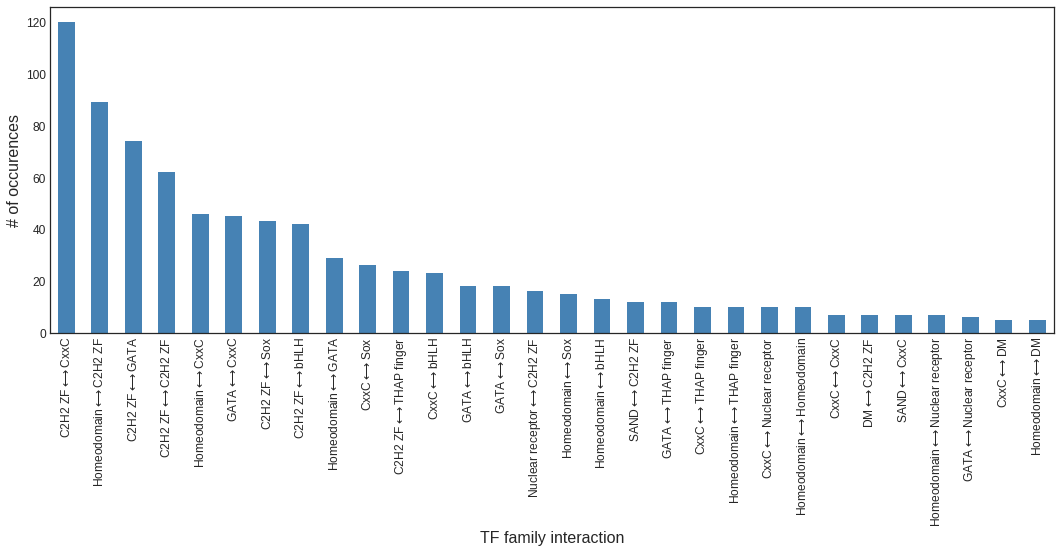

In [67]:
ax = df['Family_Interaction'].value_counts()[:30].plot(kind='bar',color='steelblue',figsize=(18,6),fontsize=12)
ax.set_xlabel("TF family interaction",fontsize=16)
ax.set_ylabel("# of occurences",fontsize=16)
ax.xaxis.set_tick_params(rotation=90)


In [68]:
len(df['TF_interaction'].value_counts()),np.median(df['TF_interaction'].value_counts())

(152, 3.0)

In [69]:
df['motifsOnlyInt'] = df['TF1']+':'+df['TF2']
df['familyOnlyInt'] = df['TF1_Family']+':'+df['TF2_Family']
df.to_csv('Attn_TAL-GATA-All_Final.txt',sep='\t')

In [70]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,...,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction,motifsOnlyInt,familyOnlyInt
0,1,filter2<-->filter9,403,M1110_1.02,0.015905,M6256_1.02,0.000012,378.0,246.0,204.0,...,2.971407e-08,7.174288e-07,HHEX,GATA4,HHEX$\longleftrightarrow$GATA4,Homeodomain,GATA,Homeodomain$\longleftrightarrow$GATA,HHEX:GATA4,Homeodomain:GATA
1,23,filter2<-->filter64,458,M1110_1.02,0.015905,M0408_1.02,0.008752,84.0,594.0,220.0,...,1.310389e-03,1.122317e-02,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF,HHEX:ZKSCAN1,Homeodomain:C2H2 ZF
2,24,filter2<-->filter65,459,M1110_1.02,0.015905,M0408_1.02,0.000641,342.0,444.0,255.0,...,5.183092e-04,4.952815e-03,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF,HHEX:ZKSCAN1,Homeodomain:C2H2 ZF
3,33,filter2<-->filter83,477,M1110_1.02,0.015905,M0408_1.02,0.001488,618.0,318.0,226.0,...,1.087586e-03,9.531951e-03,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF,HHEX:ZKSCAN1,Homeodomain:C2H2 ZF
4,44,filter2<-->filter114,508,M1110_1.02,0.015905,M0891_1.02,0.038392,168.0,114.0,253.0,...,4.218307e-05,5.314960e-04,HHEX,TLX2,HHEX$\longleftrightarrow$TLX2,Homeodomain,Homeodomain,Homeodomain$\longleftrightarrow$Homeodomain,HHEX:TLX2,Homeodomain:Homeodomain


### Annotate Interactions using TRUSTv2 (and other sources)

In [71]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

    
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/mouse_co-regulate_dict.pckl','rb') as f:
    mouse_dict = pickle.load(f)  

In [72]:
def annotate_interaction(x, intr_dict = None):
    TFs_A,TFs_B = x.split(r'$\longleftrightarrow$')
    TFs_A = TFs_A.split(',')
    TFs_B = TFs_B.split(',')
    
    for TF_A in TFs_A:
        if TF_A not in intr_dict:
            continue
        for TF_B in TFs_B:
            if TF_B not in intr_dict:
                continue
            TF_A_targets = intr_dict[TF_A][:,0]
            TF_B_targets = intr_dict[TF_B][:,0]
            if len(set.intersection(set(TF_A_targets),set(TF_B_targets))) != 0:
                return 1 #interaction found (the two TFs have shared targets)
            
    
    return 0

In [73]:
df['Interaction_in_TRUSTv2'] = df['TF_interaction'].apply(annotate_interaction, intr_dict = human_dict)

In [74]:
df['Interaction_in_TRUSTv2'].value_counts()

0    853
1      3
Name: Interaction_in_TRUSTv2, dtype: int64

In [75]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1][df.columns[[0,1,3,4,5,6,7,8,12,13,14,15,16,17,18]]]

In [76]:
df_resTRUSTv2[['TF_interaction','TF1_Family','TF2_Family','adjusted_pval']].groupby('TF_interaction').max()

,TF1_Family,TF2_Family,adjusted_pval
TF_interaction,,,
ESR1$\longleftrightarrow$GATA2,Nuclear receptor,GATA,1.485698e-09
GATA4$\longleftrightarrow$ESR1,GATA,Nuclear receptor,2.502632e-16
GATA4$\longleftrightarrow$GATA2,GATA,GATA,1.180742e-15


In [77]:
dfx = df[['filter_interaction','TF_interaction','Family_Interaction','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_interaction')
dfx.to_csv('ATTN_TF_unique_interactions_TAL-GATA.csv',index=None)
